In [117]:
import warnings
warnings.filterwarnings('ignore')

使用的示例数据集：
+ 目标检测和polygon形式的语义分割，都是用的气球数据集
+ mask形式的语义分割，
    + 用这个受损花朵分割（280MB）：[Accurate damaged flower shapes/segmentation](https://www.kaggle.com/datasets/metavision/accurate-damaged-flower-shapessegmentation)
    + 一开始想用的kaggle上一个花的语义分割数据集：[Flower Segmentation](https://www.kaggle.com/competitions/test-segm-comp/data)，但是限制下载。。
    + 之前的西瓜语义分割数据集（标注不是很好）：https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip

# 1. 直接用Openmmlab系列的

在macos本地试了一下，也在colab上试了一下
+ macOS本地一开始在mmdet中报错：`ModuleNotFoundError: No module named 'mmcv._ext'`，是因为安装了`"mmcv-lite>=2.0.0rc1"`库，还是需要安装完整版的
+ 详见：[我安装了mmdet 打了from mmdet.apis import inference_detector, init_detector 报错ModuleNotFoundError: No module named 'mmcv._ext' #8540
](https://github.com/open-mmlab/mmdetection/issues/8540)

## 0-1.Colab

In [ ]:
!pip3 install install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [ ]:
!pip install mmengine
# mmengine 0.7.4

In [ ]:
# !pip install "mmcv>=2.0.0"
# !pip install "mmcv-lite>=2.0.0rc1"
# Successfully installed mmcv-lite-2.0.0
# Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.11.0/index.html
!wget https://download.openmmlab.com/mmcv/dist/cu113/torch1.11.0/mmcv-2.0.0-cp310-cp310-manylinux1_x86_64.whl
!pip install mmcv-2.0.0-cp310-cp310-manylinux1_x86_64.whl

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git

In [ ]:
!cd mmdetection && pip install -v -e .
# "-v" 指详细说明，或更多的输出
# "-e" 表示在可编辑模式下安装项目，因此对代码所做的任何本地修改都会生效，从而无需重新安装。

macOS下这种方式安装会提示：
+ ` Skipping link: unsupported archive format: .egg: https://files.pythonhosted.org/packages/aa/7b/604665d0552f5ffc44a99d3bb71208ebca52e799b36b03d6cf4026aba9a4/Shapely-1.0a7-py2.4.egg#sha256=25e23fa21c42a1c4cd71133c8819c83728a0c6f76e5c5746cd607068faaf9507 (from https://pypi.org/simple/shapely/)`
+ 这个Openmmlab的库，感觉还是不太行

In [ ]:
!git clone https://github.com/open-mmlab/mmsegmentation.git

In [ ]:
!cd mmsegmentation && pip install -v -e .

In [9]:
# !pip install mmdet
# !pip install mmseg

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

## 0-2 MacOS本地

In [ ]:
!pip install mmengine
# mmengine 0.7.4

关于mmcv的安装，参考：[Install with pip](https://mmcv.readthedocs.io/en/latest/get_started/installation.html)
+ 选择自己的操作系统，torch版本等，会自动生成pip命令，指明需要的index中wheel包的索引

In [10]:
!pip show torch

Name: torch
Version: 1.9.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /Users/huangshan/Documents/software/miniconda3/miniconda3/envs/py37/lib/python3.7/site-packages
Requires: typing-extensions
Required-by: torchvision, torchio


In [11]:
!pip install mmcv==2.0.0 -f https://download.openmmlab.com/mmcv/dist/cpu/torch1.9/index.html
# Successfully installed mmcv-2.0.0

Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch1.9/index.html
     |████████████████████████████████| 1.3 MB 1.5 MB/s eta 0:00:01


关于MMDetection的安装，macOS上安装和普通的linux还不太一样。。。参考：[Installation](https://mmdetection.readthedocs.io/en/v2.2.0/install.html#install-mmdetection)

In [ ]:
!git clone --depth 1 https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...


In [2]:
!cd mmdetection && pip install -r requirements/build.txt && pip install -v -e .  # or "python setup.py develop"

Using pip 21.0.1 from /Users/huangshan/Documents/software/miniconda3/miniconda3/envs/py37/lib/python3.7/site-packages/pip (python 3.7)
Non-user install because site-packages writeable
Created temporary directory: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-ephem-wheel-cache-4eecobjl
Created temporary directory: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-req-tracker-7h3b6f62
Initialized build tracking at /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-req-tracker-7h3b6f62
Created build tracker: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-req-tracker-7h3b6f62
Entered build tracker: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-req-tracker-7h3b6f62
Created temporary directory: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-install-uh18h3xi
Obtaining file:///Users/huangshan/Documents/DailyStudy/openMMLabCampusLearn/selfExercise/mmdetection
  Added file:///Users/huangshan/Documents/DailyStudy/openM

In [4]:
import mmdet
print(mmdet.__version__)

3.0.0


In [ ]:
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git

In [5]:
!cd mmsegmentation && pip install -v -e .

Using pip 21.0.1 from /Users/huangshan/Documents/software/miniconda3/miniconda3/envs/py37/lib/python3.7/site-packages/pip (python 3.7)
Non-user install because site-packages writeable
Created temporary directory: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-ephem-wheel-cache-_lcf8f1l
Created temporary directory: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-req-tracker-kst6khj5
Initialized build tracking at /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-req-tracker-kst6khj5
Created build tracker: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-req-tracker-kst6khj5
Entered build tracker: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-req-tracker-kst6khj5
Created temporary directory: /private/var/folders/qc/18zs860s79jg5k6p1pdwplpc0000gn/T/pip-install-irsdwvir
Obtaining file:///Users/huangshan/Documents/DailyStudy/openMMLabCampusLearn/selfExercise/mmsegmentation
  Added file:///Users/huangshan/Documents/DailyStudy/op

In [6]:
import mmseg
print(mmseg.__version__)

1.0.0


## 0-3 Openmmlab中数据处理Pipeline

1. 关于**pipeline的设计**，可以看看：
+ [MMCV-数据变换（pipeline）](https://mmcv.readthedocs.io/zh_CN/latest/understand_mmcv/data_transform.html)
+ 自定义数据处理流程pipeline：
    + 中文：<https://mmdetection.readthedocs.io/zh_CN/latest/advanced_guides/customize_transforms.html>
    + 英文：<https://mmdetection.readthedocs.io/en/v2.19.1/tutorials/data_pipeline.html>
+ [轻松掌握 MMDetection 整体构建流程(二)](https://zhuanlan.zhihu.com/p/341954021)

2. 一般**pipeline中的模块**包括以下功能：
+ 图片和标签加载，通常用的类是 `LoadImageFromFile` 和 `LoadAnnotations`
+ 数据前处理，例如统一 Resize
+ 数据增强，典型的例如各种图片几何变换等，这部分是训练流程特有，测试阶段一般不采用(多尺度测试采用其他实现方式)
+ ~~数据收集，例如 Collect~~--(mmdetection)
+ 数据格式化，根据任务不同，在各个仓库使用自己的变换操作，通常名为 `PackXXXInputs`，其中 XXX 是任务的名称，如分类任务中的 `PackClsInputs`。(mmengine)

 >在 MMDetection 框架中，图片和标签加载和数据后处理流程一般是固定的，用户主要可能修改的是数据增强步骤

3. mmcv或者mmengine支持的**数据变换类大致分为数据加载、数据预处理与增强、数据格式化**，详见：
+ mmcv的：<https://mmcv.readthedocs.io/zh_CN/latest/understand_mmcv/data_transform.html#id4>
+ mmengine的：<https://mmengine.readthedocs.io/zh_CN/latest/advanced_tutorials/data_transform.html#id3>
+ 由于是不同的人在维护，所以这个文档并不同步。。。

----
4. 下面配置中涉及到的一些不是很通用的数据增强模块：
+ **Cached Mosaic**，RTMDet中提出的一种数据增强方式，可以看看：[目标检测论文阅读笔记】RTMDet: An Empirical Study of Designing Real-Time Object Detectors（2022）](https://blog.csdn.net/YoooooL_/article/details/129580232)
    + 来源于Yolo4中的tricks，Mosaic，详见：[目标检测的Tricks | 【Trick7】数据增强——Mosaic（马赛克）](https://developer.aliyun.com/article/1077562)
+ **YOLOXHSVRandomAug**,类似的有`YOLOv5HSVRandomAug`，应该是YoloV5中提出的，
    + 可以看看：[玩转 MMYOLO 基础类第一期： 配置文件太复杂？继承用法看不懂？配置全解读来了](https://zhuanlan.zhihu.com/p/577715188)
    + [第十二篇—HSV数据增强（YOLOv5专题）](https://www.bilibili.com/read/cv23515308)
    + [调整yolov5的mosic模式和HSV色相、对比度、亮度](https://blog.csdn.net/qq_41375318/article/details/129815813)
    + [【玩转yolov5】请看代码之augment_hsv](https://blog.csdn.net/ChuiGeDaQiQiu/article/details/113057867)

---
再吐槽一句，Openmmlab使用成本和上手（比较熟练使用）门槛相对有一些高

## 1.1 目标检测的（MMDetection）

### 1.准备数据

1. 根据[MMDET.APIS](https://mmdetection.readthedocs.io/zh_CN/latest/api.html#mmdet-datasets)
    + 目前数据集只支持`COCO`风格的标注
    + 一般配置里不写`dataset_type`，是因为默认 `dataset_type= 'CocoDataset'`，

2. 在[自定义数据集](https://mmdetection.readthedocs.io/zh_CN/latest/advanced_guides/customize_dataset.html)中，提到：
    + 在 MMDetection 中，建议将数据转换成 COCO 格式并以离线的方式进行，**完成数据转换后只需修改配置文件中的标注数据的路径和类别即可（metainfo）**。
    + 整理成coco数据集格式就可以（主要是标注格式）

这下面是colab需要的操作，直接git项目的就不用

In [ ]:
!rm -rf balloon_dataset*
%cd /content
!wget https://download.openmmlab.com/mmyolo/data/balloon_dataset.zip
!unzip balloon_dataset.zip -d balloon_dataset && rm balloon_dataset.zip

In [13]:
!mv /content/balloon_dataset/balloon /content

In [14]:
!rm -rf /content/balloon_dataset

In [20]:
!cp /content/drive/MyDrive/OpenMMLab/selfExercise/annotations  -r /content/balloon/

### 2.准备config

其实我并没有训练相关的内容，所以config里只用写Dataloader和pipeline相关的内容即可
+ 关于配置文件Config，可以看MMengine的文档：[配置（CONFIG）](https://mmengine.readthedocs.io/zh_CN/latest/advanced_tutorials/config.html)，很全面，读取、修改、继承保存等
+ 数据变换在Config中的使用，可以看MMengine的文档：[数据变换 (DATA TRANSFORM)](https://mmengine.readthedocs.io/zh_CN/latest/advanced_tutorials/data_transform.html)

下面的内容在写的时候主要是参考：
+ <https://mmdetection.readthedocs.io/en/v2.19.1/tutorials/data_pipeline.html>
+ <https://mmdetection.readthedocs.io/zh_CN/latest/advanced_guides/customize_dataset.html#id2>

In [13]:
import os
objectDetection = """# 1.可视化后端选择Local本地后端
vis_backends = [dict(type='LocalVisBackend')]
visualizer = dict(
    type='DetLocalVisualizer',
    vis_backends=[dict(type='LocalVisBackend')],
    name='visualizer')

# 2. 数据集配置
dataset_type = 'CocoDataset'
data_root = 'datasets/balloon'

# 3. pipeline（暂时只需要train的）
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    # 数据加载模块，图像和标注
    dict(type='LoadImageFromFile', backend_args=None),
    dict(
        type='LoadAnnotations',
        with_bbox=True,
        with_mask=False,  # False,则browse_dataset脚本结果不显示mask；True,则显示mask
        poly2mask=False),
    # 数据增强
    dict(
        type='CachedMosaic',
        img_scale=(640, 640),
        pad_val=114.0,
        max_cached_images=20,
        random_pop=False),
    dict(
        type='RandomResize',
        scale=(1280, 1280),
        ratio_range=(0.5, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(640, 640)),
    dict(type='YOLOXHSVRandomAug'),
    dict(type='RandomFlip', prob=0.5),
    dict(type='Pad', size=(640, 640), pad_val=dict(img=(114, 114, 114))),
    dict(
        type='CachedMixUp',
        img_scale=(640, 640),
        ratio_range=(1.0, 1.0),
        max_cached_images=10,
        random_pop=False,
        pad_val=(114, 114, 114),
        prob=0.5),
    dict(type='FilterAnnotations', min_gt_bbox_wh=(1, 1)),
    # 格式化
    dict(type='PackDetInputs')
]

# 4. train_dataloader
metainfo={
  'classes':('balloon',),
  'palette':[(220,20,60),]
}

train_dataloader = dict(
    batch_size=5,
    num_workers=2,
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        ann_file='annotations/train_coco.json',
        data_prefix=dict(img='train'),
        pipeline = train_pipeline,
        metainfo=metainfo
        )
    )


"""
os.makedirs("Config/",exist_ok=True)
objectDetectionConfigPath = "Config/detBalloon.py"
with open(objectDetectionConfigPath,'w') as f:
    f.write(objectDetection)

直接使用脚本，所以不用API方式
```
from mmengine import Config
objectDetectionConfig = Config.fromfile()
```

### 3.调用脚本进行可视化（气球）

+ 脚本位置：tools/analysis_tools/browse_dataset.py
+ 文档位置：<https://mmdetection.readthedocs.io/zh_CN/latest/user_guides/visualization.html>

一开始的输出信息是：
```bash
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
```
所以用了pycocotools

运行下面的命令：
+ 会把数据增强（送入网络的Dataloader的图像）处理后的结果存在`--output-dir`参数指定的文件夹里，
+ 没必要看那么多，用下面的自定义函数看一些就可以了其实

In [14]:
!python mmdetection/tools/analysis_tools/browse_dataset.py Config/detBalloon.py \
--output-dir Output/

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
06/28 17:15:43 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/61, elapsed: 0s, ETA:/Users/huangshan/Documents/software/miniconda3/miniconda3/envs/py37/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:759: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  ' the drawn bbox may not be in the image', UserWarning)
/Users/huangshan/Documents/software/miniconda3/miniconda3/envs/py37/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:830: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  ' the drawn polygon may not be in the image', UserWarning)
[>                                 ] 3/61, 1.9 task/s, elapsed: 2s, ETA:    31s/Users/huangshan/Documents/software/miniconda3/miniconda3/envs/py37/lib/python3.7

### 4.自定义简单可视化脚本

In [120]:
gt_bboxes.tensor

tensor([[628.8132,   0.0000, 640.0000, 370.9187],
        [579.1194, 203.5823, 640.0000, 523.0427],
        [467.5617, 218.2876, 622.2212, 480.4480]])

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


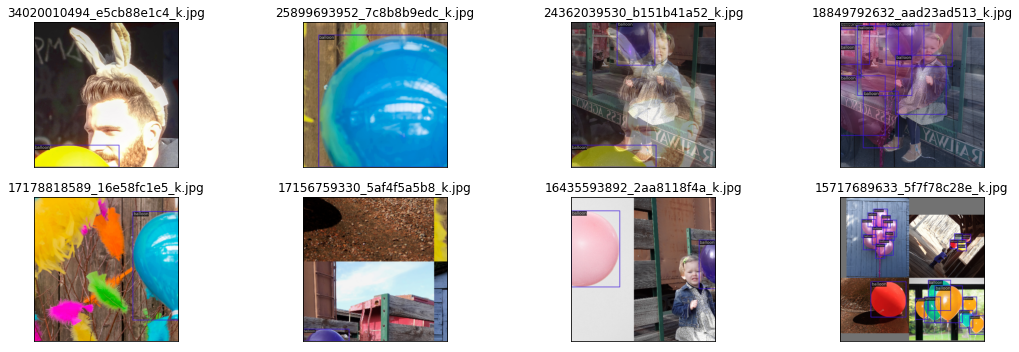

In [129]:
from mmdet.registry import DATASETS, VISUALIZERS
from mmengine.config import Config
from mmengine.registry import init_default_scope
import matplotlib.pyplot as plt

cfg = Config.fromfile('Config/detBalloon.py')

init_default_scope(cfg.get('default_scope', 'mmdet'))

dataset = DATASETS.build(cfg.train_dataloader.dataset)
visualizer = VISUALIZERS.build(cfg.visualizer)
visualizer.dataset_meta = dataset.metainfo

plt.figure(figsize=(16, 5))

# 只可视化前 8 张图片
for i in range(8):
    item=dataset[i]
    img = item['inputs'].permute(1, 2, 0).numpy()
    data_sample = item['data_samples'].numpy()
    
    img_path = os.path.basename(item['data_samples'].img_path)

    # 这部分代码看似没用，注释会报错
    """
    `bboxes` should be (<class 'numpy.ndarray'>, <class 'torch.Tensor'>)  
    but got <class 'mmdet.structures.bbox.horizontal_boxes.HorizontalBoxes'>
    所以这里把bbox取出来，拿到tensor重新赋值
    """
    gt_instances = data_sample.gt_instances
    gt_bboxes = gt_instances.get('bboxes', None)
    # 这个方法位于 mmengine/structures/base_data_element.py
    gt_instances.bboxes = gt_bboxes.tensor
    data_sample.gt_instances = gt_instances
    

    visualizer.add_datasample(
            os.path.basename(img_path),
            img,
            data_sample,
            draw_pred=False,
            show=False)
    drawed_image=visualizer.get_image()

    plt.subplot(2, 4, i+1)
    plt.imshow(drawed_image[..., [2, 1, 0]])
    plt.title(f"{os.path.basename(img_path)}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

有warning信息(bbox可能在图像外面了，显示不出来。。。)：

```bash
UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  ' the drawn bbox may not be in the image', UserWarning)
```

## 1.2 实例分割-polygon形式的segmentation标记（（MMDetection））

由于气球数据集不仅有box，而且有segmentation，所以数据就不用特别准备了
+ MMDetection是实例分割和全景分割,这个气球数据集是个实例分割（不同的气球用不同颜色标注了）
+ MMSegmentation是语义分割，所以用之前的西瓜数据集做语义分割或者找到的那个花的数据集

如果是实例分割（Instance Segmentation），则和1.1目标检测部分代码完全一致。只需要把`LoadAnnotations`中`with_mask`改为`with_mask=True`即可。

这几个配置项的含义，详见：[MMDetection-Dataset and evaluator config](https://mmdetection.readthedocs.io/en/dev-3.x/user_guides/config.html#dataset-and-evaluator-config)

```python
train_pipeline = [  # Training data processing pipeline
    dict(type='LoadImageFromFile', backend_args=backend_args),  # First pipeline to load images from file path
    dict(
        type='LoadAnnotations',  # Second pipeline to load annotations for current image
        with_bbox=True,  # Whether to use bounding box, True for detection
        with_mask=True,  # Whether to use instance mask, True for instance segmentation
        poly2mask=True),  # Whether to convert the polygon mask to instance mask, set False for acceleration and to save memory
    dict(
        type='Resize',  # Pipeline that resizes the images and their annotations
        scale=(1333, 800),  # The largest scale of the images
        keep_ratio=True  # Whether to keep the ratio between height and width
        ),
    dict(
        type='RandomFlip',  # Augmentation pipeline that flips the images and their annotations
        prob=0.5),  # The probability to flip
    dict(type='PackDetInputs')  # Pipeline that formats the annotation data and decides which keys in the data should be packed into data_samples
]
```

**注意**：

```python
# 这个脚本必须有bbox，
cfg.train_dataloader.dataset.pipeline[1].with_bbox=True
```

在**MMDetection的transform**里，有断言验证：

```python
~/Documents/DailyStudy/openMMLabCampusLearn/selfExercise/mmdetection/mmdet/datasets/transforms/loading.py in transform(self, results)
    718             dict: Updated result dict.
    719         """
--> 720         assert 'gt_bboxes' in results
    721         gt_bboxes = results['gt_bboxes']
    722         if gt_bboxes.shape[0] == 0:
```

所以如果不使用**MMDetection的transform**，其实就可以不要bbox了

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


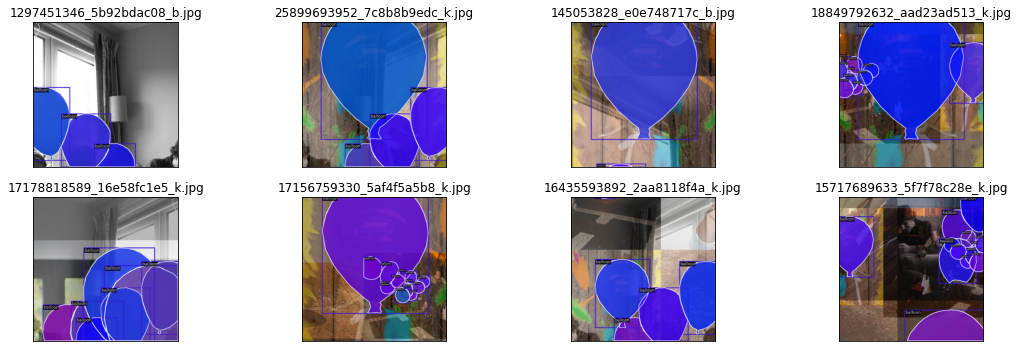

In [26]:
from mmdet.registry import DATASETS, VISUALIZERS
from mmengine.config import Config
from mmengine.registry import init_default_scope
import matplotlib.pyplot as plt

cfg = Config.fromfile('Config/detBalloon.py')
# 直接代码里改成True，显示mask
cfg.train_dataloader.dataset.pipeline[1].with_mask=True
cfg.train_dataloader.dataset.pipeline[1].with_bbox=True

init_default_scope(cfg.get('default_scope', 'mmdet'))

dataset = DATASETS.build(cfg.train_dataloader.dataset)
visualizer = VISUALIZERS.build(cfg.visualizer)
visualizer.dataset_meta = dataset.metainfo

plt.figure(figsize=(16, 5))

# 只可视化前 8 张图片
for i in range(8):
    item=dataset[i]
    img = item['inputs'].permute(1, 2, 0).numpy()
    data_sample = item['data_samples'].numpy()
    gt_instances = data_sample.gt_instances
    img_path = os.path.basename(item['data_samples'].img_path)

    gt_bboxes = gt_instances.get('bboxes', None)
    gt_instances.bboxes = gt_bboxes.tensor
    data_sample.gt_instances = gt_instances

    visualizer.add_datasample(
            os.path.basename(img_path),
            img,
            data_sample,
            draw_pred=False,
            show=False)
    drawed_image=visualizer.get_image()

    plt.subplot(2, 4, i+1)
    plt.imshow(drawed_image[..., [2, 1, 0]])
    plt.title(f"{os.path.basename(img_path)}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

## 1.X mmcv的LoadAnnotations和MMDetection的LoadAnnotations

+ mmcv的LoadAnnotations源码：<https://github.com/open-mmlab/mmcv/blob/main/mmcv/transforms/loading.py#L135>
```python
"""
Args:
    with_bbox (bool): Whether to parse and load the bbox annotation.
        Defaults to True.
    with_label (bool): Whether to parse and load the label annotation.
        Defaults to True.
    with_seg (bool): Whether to parse and load the semantic segmentation
        annotation. Defaults to False.
    with_keypoints (bool): Whether to parse and load the keypoints
        annotation. Defaults to False.
    imdecode_backend (str): The image decoding backend type. The backend
        argument for :func:`mmcv.imfrombytes`.
        See :func:`mmcv.imfrombytes` for details.
        Defaults to 'cv2'.
    file_client_args (dict, optional): Arguments to instantiate a
        FileClient. See :class:`mmengine.fileio.FileClient` for details.
        Defaults to None. It will be deprecated in future. Please use
        ``backend_args`` instead.
        Deprecated in version 2.0.0rc4.
    backend_args (dict, optional): Instantiates the corresponding file
        backend. It may contain `backend` key to specify the file
        backend. If it contains, the file backend corresponding to this
        value will be used and initialized with the remaining values,
        otherwise the corresponding file backend will be selected
        based on the prefix of the file path. Defaults to None.
        New in version 2.0.0rc4.
"""
```

+ MMDetection的LoadAnnotations源码:<https://github.com/open-mmlab/mmdetection/blob/main/mmdet/datasets/transforms/loading.py#L368>

MMDetection的LoadAnnotations是继承自mmcv的LoadAnnotations：

```python
@TRANSFORMS.register_module()
class LoadAnnotations(MMCV_LoadAnnotations):
    """Load and process the ``instances`` and ``seg_map`` annotation provided
    by dataset.

    The annotation format is as the following:
    
    Args:
        with_bbox (bool): Whether to parse and load the bbox annotation.
            Defaults to True.
        with_label (bool): Whether to parse and load the label annotation.
            Defaults to True.
        with_mask (bool): Whether to parse and load the mask annotation.
             Default: False.
        with_seg (bool): Whether to parse and load the semantic segmentation
            annotation. Defaults to False.
        poly2mask (bool): Whether to convert mask to bitmap. Default: True.
        box_type (str): The box type used to wrap the bboxes. If ``box_type``
            is None, gt_bboxes will keep being np.ndarray. Defaults to 'hbox'.
        imdecode_backend (str): The image decoding backend type. The backend
            argument for :func:``mmcv.imfrombytes``.
            See :fun:``mmcv.imfrombytes`` for details.
            Defaults to 'cv2'.
        backend_args (dict, optional): Arguments to instantiate the
            corresponding backend. Defaults to None.
```

+ 所以默认mmcv的LoadAnnotations没有`with_mask`参数，但是MMDetection的LoadAnnotations就有。。这个继承机制真的可以

## 1.3 语义分割（mask形式的segmentation标记）

主要是医疗、遥感和自动驾驶这三个场景会用这种数据集，还有一些农作物植物检测（树叶，花）等会用到
+ 不过这种数据集很简单，一个文件夹是图像（一般是jpg格式），另一个文件夹是mask图像（一般是png格式）
+ 最多自己做数据集的划分
+ 要用MMSegmentation库，就需要自己写一个数据集文件了

另外，注意：
+ 如果希望在没有文本文件的情况下，去找到原图和mask的对应，那么肯定需要二者名称相同，后缀可以不同
+ [ADD NEW DATASETS](https://mmsegmentation.readthedocs.io/en/main/advanced_guides/add_datasets.html)
+ Note: The annotations are images of shape (H, W), the value pixel should fall in range [0, num_classes - 1]. You may use 'P' mode of pillow to create your annotation image with color.
    + 关于Pillow的模式，类似于cv2在imread中的flag，读取图像是灰度还是彩色，详见：[pillow-Modes](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes)，
    + 使用可以看看：[What is the difference between images in 'P' and 'L' mode in PIL?](https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil)
    + **标记类别从0开始**

### 1. 准备数据（注册数据集类）

In [98]:
from mmseg.datasets.basesegdataset import BaseSegDataset
from mmseg.registry import DATASETS
import matplotlib.pyplot as plt

@DATASETS.register_module()
class FlowerDataset(BaseSegDataset):
    METAINFO = dict(
        # 背景类，unlabeled ID=0的类，好像要放在最后？？？
        classes=('flower', 'unlabeled'),
        # rgb format
        palette=[[255, 0, 13],[0,0,0]])

    def __init__(self,
                 img_suffix='.jpg',
                 seg_map_suffix='.png',
                 reduce_zero_label=False,
                 **kwargs) -> None:
        super().__init__(
            img_suffix=img_suffix,
            seg_map_suffix=seg_map_suffix,
            reduce_zero_label=reduce_zero_label,
            **kwargs)

### 2. 准备config

+ 如果想通过**API方式获取数据增强后的结果**，参考：[Design of Data pipelines](https://mmsegmentation.readthedocs.io/en/main/advanced_guides/transforms.html)
+ 数据增强方式的代码：[mmsegmentation/mmseg/datasets/transforms
/transforms.py-mmsegmentation/mmseg/datasets/transforms
/transforms.py](https://github.com/open-mmlab/mmsegmentation/blob/main/mmseg/datasets/transforms/transforms.py#L570)
+ 文档：<https://mmsegmentation.readthedocs.io/en/latest/advanced_guides/transforms.html>
+ [YOLOv4中的tricks概念总结——Bag of freebies](https://blog.csdn.net/weixin_44751294/article/details/117987180)

数据处理部分是类似的，但是因为这次是语义分割任务，所以可视化后端，以及数据pipeline的最后，数据集会不太一样

注意：
+ MMSegmentation也对那个LoadAnnotations进行了继承（重构），所以参数也不一样。。。init里继承前那些参数还是有的，有默认值
    ```python
        def __init__(
        self,
        reduce_zero_label=None,
        backend_args=None,
        imdecode_backend='pillow',
    ) -> None:
        super().__init__(
            with_bbox=False,
            with_label=False,
            with_seg=True,  # 默认只要seg
            with_keypoints=False,
            imdecode_backend=imdecode_backend,
            backend_args=backend_args)
    ```
+ 详见代码：<https://github.com/open-mmlab/mmsegmentation/blob/main/mmseg/datasets/transforms/loading.py#L17>
    ```python
    """
     Args:
        reduce_zero_label (bool, optional): Whether reduce all label value
            by 1. Usually used for datasets where 0 is background label.
            Defaults to None.
        imdecode_backend (str): The image decoding backend type. The backend
            argument for :func:``mmcv.imfrombytes``.
            See :fun:``mmcv.imfrombytes`` for details.
            Defaults to 'pillow'.
        backend_args (dict): Arguments to instantiate a file backend.
            See https://mmengine.readthedocs.io/en/latest/api/fileio.htm
            for details. Defaults to None.
            Notes: mmcv>=2.0.0rc4, mmengine>=0.2.0 required.
    """
    ```

In [110]:
flower_config = """vis_backends = [dict(type='LocalVisBackend')]
visualizer = dict(
    type='SegLocalVisualizer', #也是把DetLocalVisualizer改成SegLocalVisualizer就可以
    vis_backends=[dict(type='LocalVisBackend')],
    name='visualizer')

# 2. 数据集配置
dataset_type = 'FlowerDataset'
data_root = 'datasets/05-damaged-01'

# 3. pipeline（暂时只需要train的）
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
    
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', reduce_zero_label=False),
    dict(
        type='RandomResize',
        scale=(512, 512),
        ratio_range=(0.5, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(512, 512), cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='PackSegInputs') # 这里要从PackDetInputs改成PackSegInputs
]

# 4. train_dataloader
train_dataloader = dict(
    batch_size=2,
    num_workers=1,
    persistent_workers=True,
    sampler=dict(type='InfiniteSampler', shuffle=True),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        data_prefix=dict(img_path='imagePart/', seg_map_path='maskPart/'),
                         pipeline=train_pipeline)
    )

"""
flower_config_path = "Config/segFlower.py"
with open(flower_config_path,"w") as f:
    f.write(flower_config)

如果可视化处理全部2545个图，太麻烦了。。。所以这里临时搞了个部分图像，从原始数据集里弄了18组出来，**记得image和mask名字要一样**

### 3.调用脚本进行可视化（花）

In [104]:
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)

```python
!python mmsegmentation/tools/analysis_tools/browse_dataset.py Config/segFlower.py \
--output-dir Output/
```

+ 和mmdetection是类似的，但是由于我这里没有把数据集的注册写入文件，所以没法使用脚本运行，需要使用API来调用这个工具
+ 但是这个脚本没有放在API里。。。
+ 所以一个比较直接的办法就是直接复制全部的代码直接运行。。

直接复制`browse_dataset.py`中实际逻辑的部分

In [115]:
import os.path as osp
from mmengine.config import Config
from mmseg.registry import DATASETS, VISUALIZERS
from mmseg.utils import register_all_modules

cfg = Config.fromfile("Config/segFlower.py")

# register all modules in mmdet into the registries
register_all_modules()

dataset = DATASETS.build(cfg.train_dataloader.dataset)
visualizer = VISUALIZERS.build(cfg.visualizer)
visualizer.dataset_meta = dataset.metainfo

for item in dataset:
    img = item['inputs'].permute(1, 2, 0).numpy()
    img = img[..., [2, 1, 0]]  # bgr to rgb
    data_sample = item['data_samples'].numpy()
    img_path = osp.basename(item['data_samples'].img_path)

    out_file = osp.join("Output/",osp.basename(img_path))

    visualizer.add_datasample(
        name=osp.basename(img_path),
        image=img,
        data_sample=data_sample,
        draw_gt=True,
        draw_pred=False,
        out_file=out_file)

**所以理论上，只要是用了`mmseg`的库都可以通过这种方式进行可视化。。**

### 4. 自定义简单可视化脚本

这里改写的话，仿照上面目标检测的，则需要从gt_instances中拿到Segmentation内容

```python
 gt_bboxes = gt_instances.get('bboxes', None)
 # 这个方法位于 mmengine/structures/base_data_element.py
```
+ 在[mmengine/mmengine/structures
/base_data_element.py](https://github.com/open-mmlab/mmengine/blob/main/mmengine/structures/base_data_element.py)中，注释示例里有：
    ```python
     >>> # inheritance
    >>> class DetDataSample(BaseDataElement):
    ```
+ 同理，则需要找`SegDataSample`，代码在[这里](https://github.com/open-mmlab/mmsegmentation/blob/main/mmseg/structures/seg_data_sample.py), 文档比较有用：[Semantic Segmentation Data SegDataSample](https://mmsegmentation.readthedocs.io/en/main/advanced_guides/structures.html)中有：

    **Field**|**Type**|**Description**
:-----:|:-----:|:-----:
gt\_sem\_seg|PixelData|Annotation information.
pred\_instances|PixelData|The predicted result.
seg\_logits|PixelData|The raw (non-normalized) predicted result.

+ 所以要找数据增强后的结果，其实就是`gt_sem_seg`这个字段了，但是seg的visualizer写的比较好，不需要再做额外处理，可能是对图像做增强，本身也比较简单


---
关于visualizer
```python
"""
- If GT and prediction are plotted at the same time, they are
displayed in a stitched image where the left image is the
ground truth and the right image is the prediction.
"""
```

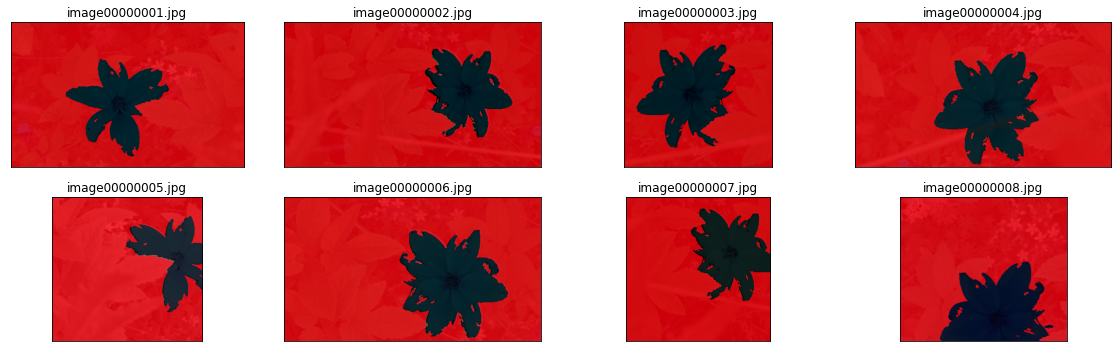

In [131]:
from mmdet.registry import DATASETS, VISUALIZERS
from mmengine.config import Config
from mmengine.registry import init_default_scope
import matplotlib.pyplot as plt
%matplotlib inline
cfg = Config.fromfile('Config/segFlower.py')

init_default_scope(cfg.get('default_scope', 'mmseg'))

dataset = DATASETS.build(cfg.train_dataloader.dataset)
visualizer = VISUALIZERS.build(cfg.visualizer)
visualizer.dataset_meta = dataset.metainfo

plt.figure(figsize=(16, 5))

# 只可视化前 8 张图片
for i in range(8):
    item=dataset[i]
    img = item['inputs'].permute(1, 2, 0).numpy()
    data_sample = item['data_samples'].numpy()
    
    img_path = os.path.basename(item['data_samples'].img_path)
    
    # 这里不需要对data_sample做任何处理，就可以直接显示了
    visualizer.add_datasample(
            os.path.basename(img_path),
            img,
            data_sample,
            draw_pred=False,
            show=False)
    drawed_image=visualizer.get_image()

    plt.subplot(2, 4, i+1)
    # 同时这个图像还不是opencv的结果，这点，seg比det要好一些
    plt.imshow(drawed_image)
    plt.title(f"{os.path.basename(img_path)}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

### 5. PixelData数据结构

关于这个PixelData数据结构，看这里：
+ [ABSTRACT DATA ELEMENT](https://mmengine.readthedocs.io/en/latest/advanced_tutorials/data_element.html)
+ [PIXELDATA](https://mmengine.readthedocs.io/en/latest/api/generated/mmengine.structures.PixelData.html?highlight=PixelData)

In [132]:
data_sample.gt_sem_seg

<PixelData(

    META INFORMATION

    DATA FIELDS
    data: array([[[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]]])
) at 0x7f943cb34050>

In [136]:
pixelData = data_sample.gt_sem_seg
pixelData.metainfo,pixelData.shape

({}, (443, 512))

In [139]:
pixelData[20,30]

<PixelData(

    META INFORMATION

    DATA FIELDS
    data: array([[[0]]])
) at 0x7f943e216710>

### 6. API获取单张结果可视化

看这里：[mmsegmentation/docs/en/user_guides
/3_inference.md#mmsegapisshow_result_pyplot](https://github.com/open-mmlab/mmsegmentation/blob/main/docs/en/user_guides/3_inference.md)

```python
from mmseg.apis import init_model, inference_model, show_result_pyplot

config_path = 'configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_path = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
img_path = 'demo/demo.png'


# build the model from a config file and a checkpoint file
model = init_model(config_path, checkpoint_path, device='cuda:0')

# inference on given image
result = inference_model(model, img_path)

# display the segmentation result
vis_image = show_result_pyplot(model, img_path, result)

# save the visualization result, the output image would be found at the path `work_dirs/result.png`
vis_iamge = show_result_pyplot(model, img_path, result, out_file='work_dirs/result.png')

# Modify the time of displaying images, note that 0 is the special value that means "forever"
vis_image = show_result_pyplot(model, img_path, result, wait_time=5)
```

# 2. 数据处理（RGB2Mask）

这个受损花朵分割（280MB）：[Accurate damaged flower shapes/segmentation](https://www.kaggle.com/datasets/metavision/accurate-damaged-flower-shapessegmentation)
+ 没有说清楚多少个类别，语义信息，需要自己分析一下

## 原始mask图像

### 查看

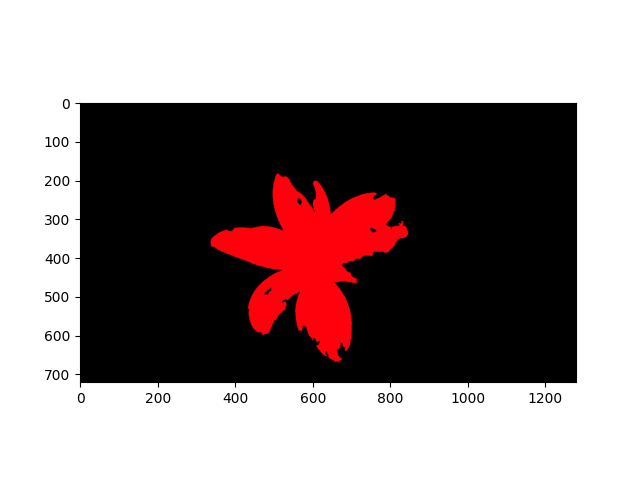

In [32]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
# %matplotlib osx
# 需要放大图查看标签语义是什么
%matplotlib ipympl

mask = cv2.imread("datasets/05-damaged-01/mask/mask00000001.png")
plt.imshow(mask[:,:,::-1])

# 查看mask的类别值

In [33]:
mask_height, mask_width, mask_channel = mask.shape
print(f"mask_height={mask_height}, mask_width={mask_width},mask_channel={mask_channel}")

mask_height=720, mask_width=1280,mask_channel=3


这个mask是三通道。。不是灰度图，而且不是标签，是普通的RGB图

### 彩图颜色分析

**获取所有颜色种类**

参考:[numpy: unique list of colors in the image](https://stackoverflow.com/questions/24780697/numpy-unique-list-of-colors-in-the-image)

In [34]:
mask.shape,mask.reshape(-1, mask.shape[2]).shape

((720, 1280, 3), (921600, 3))

可以理解为，有个长度为921600的列表，里面每个元素都是一个长度为3的列表（颜色RGB）

In [35]:
mask.reshape(-1, mask.shape[2])[:2]

array([[0, 0, 0],
       [0, 0, 0]], dtype=uint8)

这时候再去调用`np.unique`就可以得到唯一的颜色种类了，详见：[numpy.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [36]:
import numpy as np
np.unique(mask.reshape(-1, mask.shape[2]), axis=0,return_counts=True)

(array([[  0,   0,   0],
        [  4,   0,  67],
        [ 12,   0, 243],
        [ 13,   0, 252],
        [ 13,   0, 255]], dtype=uint8),
 array([813467,    322,      1,    336, 107474]))

或者老一点的方法，用Counter和for循环，计算效率应该没有np高

In [37]:
from collections import Counter
Counter([tuple(colors) for i in mask for colors in i])

Counter({(0, 0, 0): 813467,
         (4, 0, 67): 322,
         (13, 0, 252): 336,
         (13, 0, 255): 107474,
         (12, 0, 243): 1})

## rgb2mask

### 0. 转为灰度图

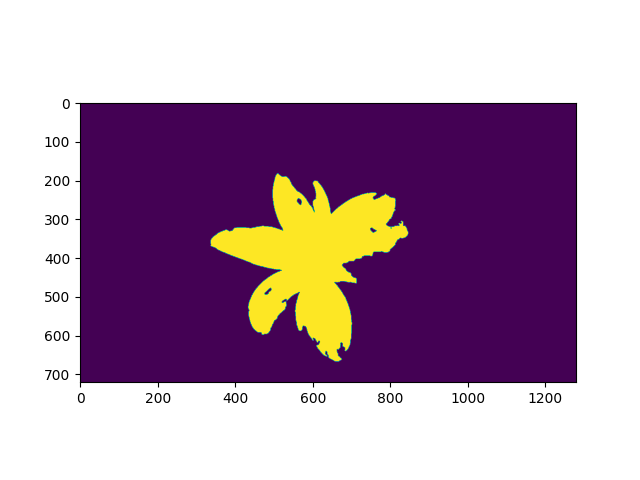

In [38]:
plt.figure()
gray_img = cv2.cvtColor(mask, cv2.COLOR_BGRA2GRAY)
plt.imshow(gray_img)

In [39]:
gray_img[1,2],np.unique(gray_img,return_counts=True)

(0,
 (array([ 0, 20, 74, 77, 78], dtype=uint8),
  array([813467,    322,      1,    336, 107474])))

**可以看到，灰度图分析的颜色结果和上面彩色图是一样的**

### 1.生成label index的numpy

In [40]:
gray_img[1,2],np.unique(gray_img,return_counts=True)

(0,
 (array([ 0, 20, 74, 77, 78], dtype=uint8),
  array([813467,    322,      1,    336, 107474])))

In [41]:
indexMapDict = {}
uniqueRs=np.unique(gray_img)
for i in range(len(uniqueRs)):
    indexMapDict[uniqueRs[i]]=i
for key,value in indexMapDict.items():
    print(key,value)

0 0
20 1
74 2
77 3
78 4


In [42]:
pngArray = np.zeros_like(gray_img)
height = gray_img.shape[0]
width = gray_img.shape[1]
# pngArray.shape  (720, 1280)
for i in range(height):
    for j in range(width):
        grayLevel = gray_img[i,j]
        pngArray[i,j]=indexMapDict[grayLevel]
np.unique(pngArray,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=uint8),
 array([813467,    322,      1,    336, 107474]))

**2.可视化看一下语义类别**

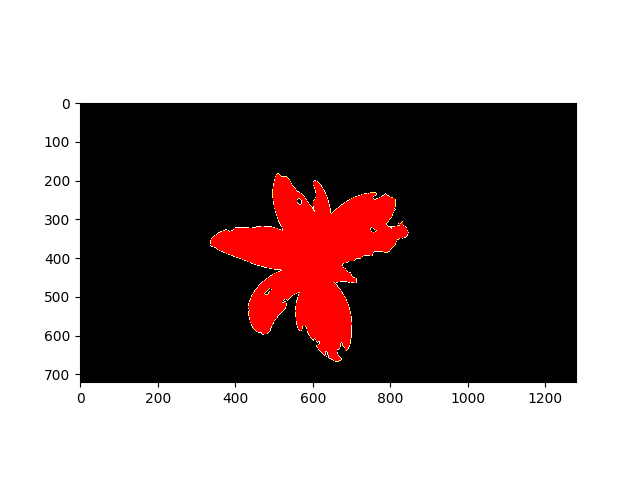

In [44]:
import matplotlib
flower_cmap = matplotlib.colors.ListedColormap(["black", "white","yellow","white","red"],N=5)

plt.figure()
plt.imshow(pngArray,cmap=flower_cmap)
# plt.close("all")

可以看出来，
+ 另两种占比很低的颜色，主要是边缘部分，
+ 可能是使用的标注软件或者是利用了一定的视频追踪标注技术导致的
+ 因此实际使用的时候，只考虑背景类是0，前景类是1

参考：
+ [语义分割中数据样本的整理标注及调色板代码](https://blog.csdn.net/anymake_ren/article/details/79087172/)，这个人的颜色图转mask写的超级麻烦。。。

最后，只保留前景和背景类，边缘的杂色全部归为背景

### 3.确认有效类别

In [45]:
indexMapDict2 = {}
uniqueRs=np.unique(gray_img)
# 0, 20, 74, 77, 78
indexMapDict2[0]=0
indexMapDict2[20]=0
indexMapDict2[74]=0
indexMapDict2[77]=0
indexMapDict2[78]=1
for key,value in indexMapDict2.items():
    print(key,value)

0 0
20 0
74 0
77 0
78 1


In [46]:
pngArray = np.zeros_like(gray_img)
height = gray_img.shape[0]
width = gray_img.shape[1]
# pngArray.shape  (720, 1280)
for i in range(height):
    for j in range(width):
        grayLevel = gray_img[i,j]
        pngArray[i,j]=indexMapDict2[grayLevel]
np.unique(pngArray,return_counts=True)

(array([0, 1], dtype=uint8), array([814126, 107474]))

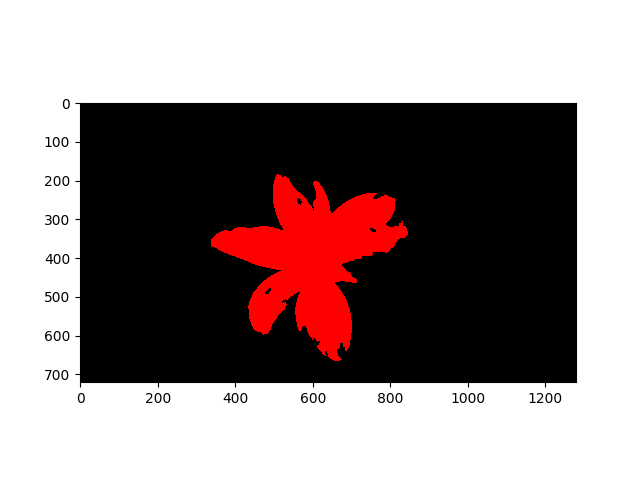

In [47]:
import matplotlib
flower_cmap = matplotlib.colors.ListedColormap(["black","red"],N=2)

plt.figure()
plt.imshow(pngArray,cmap=flower_cmap)
# plt.close("all")

### 4.写成函数，处理所有mask并另存为

这种写法慢（根据dict手动索引赋值，下面另一种写法快）

In [ ]:
import os
import cv2
import numpy as np
raw_mask_base = "datasets/05-damaged-01/mask"

save_mask_base = "datasets/05-damaged-01/maskLabel"
os.makedirs(save_mask_base,exist_ok=True)

maskList = os.listdir(raw_mask_base)
wrong_filename=[]
for imgName in maskList:
    imgPath = os.path.join(raw_mask_base,imgName)
    savePath = os.path.join(save_mask_base,imgName.split(".")[0]+str('.png'))
    mask = cv2.imread(imgPath)
    gray_img = cv2.cvtColor(mask, cv2.COLOR_BGRA2GRAY)
    
    indexMapDict2 = {}
    uniqueRs=np.unique(gray_img)
    # 如果标签全都有效
    # for i in range(len(uniqueRs)):
    #     indexMapDict2[uniqueRs[i]]=i
    # 否则，就需要手动指定标签
    indexMapDict2[0]=0
    indexMapDict2[20]=0
    indexMapDict2[74]=0
    indexMapDict2[77]=0
    indexMapDict2[78]=1
    
    try:
        pngArray = np.zeros_like(gray_img,dtype=np.int16)
        height = gray_img.shape[0]
        width = gray_img.shape[1]
        for i in range(height):
            for j in range(width):
                grayLevel = gray_img[i,j]
                pngArray[i,j]=indexMapDict2[grayLevel] 
        # print(pngArray[600,20])
        cv2.imwrite(savePath, pngArray)
        # print(f"image has been saved successfully at: {savePath}")
    except Exception as e:
        wrong_filename.append(imgName)
        print(f'处理出现问题：{e}，文件是 {imgName}')

参考：[Translate every element in numpy array according to key](https://stackoverflow.com/questions/16992713/translate-every-element-in-numpy-array-according-to-key)

```bash
>>> a = np.array([[1,2,3],[3,2,1]])
>>> a
array([[1, 2, 3],
       [3, 2, 1]])
>>> d = {1 : 11, 2 : 22, 3 : 33}
>>> u,inv = np.unique(a,return_inverse = True)
>>> np.array([d[x] for x in u])[inv].reshape(a.shape)
array([[11, 22, 33],
       [33, 22, 11]])
```

实际测试了一下，果然快了非常非常非常多。。。感觉确实有100x的样子

上面出现问题是因为，
+ 不是所有转换后的灰度图的的unique结果都是[ 0 20 74 77 78]，有的还有[ 0 20 38 74 77 78]，多个38.可能还会有别的。
+ 因此，在构建dict映射的时候，直接找像素数量最多的是背景，次多的就是前景，其余都设置为前景
+ 同时用上面加速后的代码，整体变快很多

In [88]:
len(wrong_filename)

42

### 4-X ✅ 优化过的代码

In [90]:
import os
import cv2
import numpy as np
raw_mask_base = "datasets/05-damaged-01/mask"

save_mask_base = "datasets/05-damaged-01/maskLabel"
os.makedirs(save_mask_base,exist_ok=True)

maskList = os.listdir(raw_mask_base)
# 只对第一步没有处理好的图像继续处理
for imgName in wrong_filename:
    imgPath = os.path.join(raw_mask_base,imgName)
    savePath = os.path.join(save_mask_base,imgName.split(".")[0]+str('.png'))
    mask = cv2.imread(imgPath)
    gray_img = cv2.cvtColor(mask, cv2.COLOR_BGRA2GRAY)
    
    mapDict = {}
    uniqueRs,index,count=np.unique(gray_img,return_inverse=True,return_counts=True)
    indexSort=np.argsort(count)
    for i in indexSort[:-2]:
        mapDict[uniqueRs[i]]=0        
    mapDict[uniqueRs[indexSort[-1]]]=0
    mapDict[uniqueRs[indexSort[-2]]]=1
    
    try:
        pngArray = np.array([mapDict[x] for x in uniqueRs])[index].reshape(gray_img.shape)
        cv2.imwrite(savePath, pngArray)
    except Exception as e:
        print(f'处理出现问题：{e}，文件是 {imgName}')

测试草稿代码：[numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [87]:
print(len(wrong_filename))
for imgName in wrong_filename:
    print(imgName)
    imgPath = os.path.join(raw_mask_base,imgName)
    savePath = os.path.join(save_mask_base,imgName.split(".")[0]+str('.png'))
    mask = cv2.imread(imgPath)
    gray_img = cv2.cvtColor(mask, cv2.COLOR_BGRA2GRAY)
    
    mapDict = {}
    
    uniqueRs,index,count=np.unique(gray_img,return_inverse=True,return_counts=True)
    indexSort=np.argsort(count)
    
    print(uniqueRs,count,indexSort)
    
    for i in indexSort[:-2]:
        mapDict[uniqueRs[i]]=0
        
    mapDict[uniqueRs[indexSort[-1]]]=0
    mapDict[uniqueRs[indexSort[-2]]]=1
    for k,v in mapDict.items():
        print(k,v)
    pngArray = np.array([mapDict[x] for x in uniqueRs])[index].reshape(gray_img.shape)
    break
    

42
mask00000745.png
[ 0 20 38 74 77 78] [810050    324      1      2    367 110856] [2 3 1 4 5 0]
38 0
74 0
20 0
77 0
0 0
78 1


In [82]:
b=[2,3,1,4,5,0]
b[-2:],b[:-2],b[-1],b[-2]

([5, 0], [2, 3, 1, 4], 0, 5)

参考：[Saving GRAYSCALE .png image with cv2.imwrite() not working](https://stackoverflow.com/questions/62920233/saving-grayscale-png-image-with-cv2-imwrite-not-working)

imwrite保存单通道灰度图，需要保证值是int（0-255范围）



+ 由于存储的图像只有0和1两个标签，在没有cmap的情况下，常规的软件打开就是一片漆黑。。
+ 所以这里还是用程序读进来
+ **这种以图像形式表示的mask标注，很方便啊，无论是显示还是数据增强操作，真友好！**

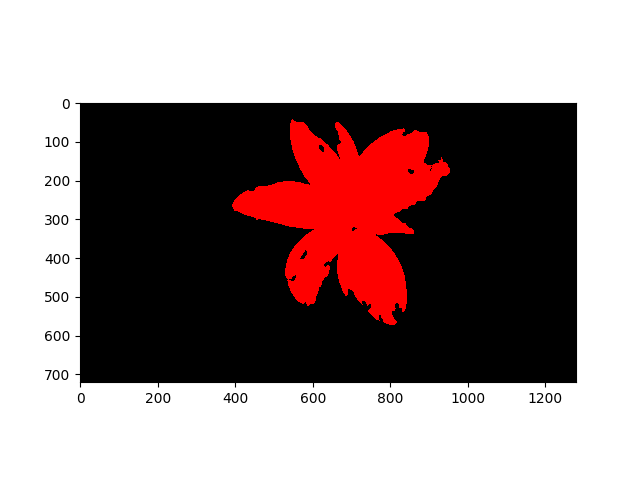

In [60]:
import matplotlib
flower_cmap = matplotlib.colors.ListedColormap(["black","red"],N=2)

checkSavePng = cv2.imread("datasets/05-damaged-01/maskLabel/mask00001857.png",cv2.IMREAD_GRAYSCALE)
plt.figure()
print(checkSavePng.shape)
plt.imshow(pngArray,cmap=flower_cmap)
# plt.close("all")

### 5. cv2.IMREAD_GRAYSCALE和BGR2GRAY数值不一致

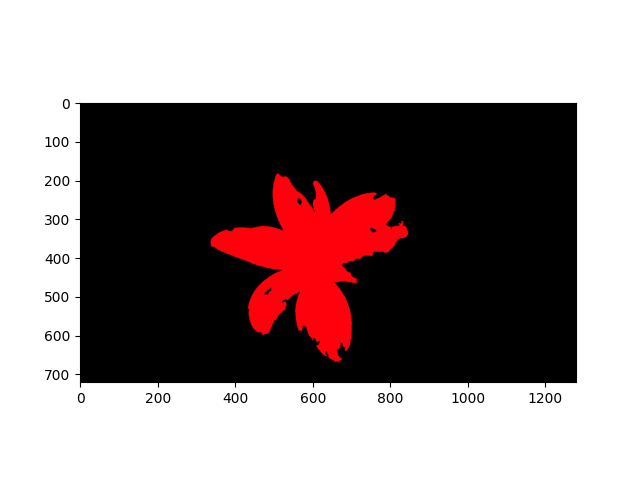

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
# %matplotlib osx
# 需要放大图查看标签语义是什么
%matplotlib ipympl

mask = cv2.imread("datasets/05-damaged-01/mask/mask00000001.png")
plt.imshow(mask[:,:,::-1])

In [9]:
np.unique(mask.reshape(-1,mask.shape[2]),axis=0)

array([[  0,   0,   0],
       [  4,   0,  67],
       [ 12,   0, 243],
       [ 13,   0, 252],
       [ 13,   0, 255]], dtype=uint8)

In [27]:
# 1
gray_image = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
np.unique(gray_image)

array([ 0, 20, 74, 77, 78], dtype=uint8)

In [30]:
# 2
gray_image = cv2.cvtColor(mask,cv2.COLOR_RGB2GRAY)
np.unique(gray_image)

array([ 0,  9, 31, 33], dtype=uint8)

In [29]:
# 3
gray_image = cv2.imread("datasets/05-damaged-01/mask/mask00000001.png",cv2.IMREAD_GRAYSCALE)
np.unique(gray_image)

array([ 0, 20, 74, 76, 77], dtype=uint8)

+ 1和2，COLOR_BGR2GRAY和COLOR_RGB2GRAY结果不同
+ 1和3，COLOR_BGR2GRAY和IMREAD_GRAYSCALE结果不同

**可以知道**：

**cv2.COLOR_RGB2GRAY**和**cv2.COLOR_BGR2GRAY**对同一图像处理，结果不同
+ 根据[Why would cv2.COLOR_RGB2GRAY and cv2.COLOR_BGR2GRAY give different results?](https://stackoverflow.com/questions/62855718/why-would-cv2-color-rgb2gray-and-cv2-color-bgr2gray-give-different-results)可知：
    + **RGB2GRAY过程中，三个通道不是平均的，是不同的权重系数，所以对同一个图分别调用`cv2.COLOR_RGB2GRAY`和`cv2.COLOR_BGR2GRAY`结果会不一样**
    + Opencv中关于RGB→GRAY图像的转换公式，详见：<https://docs.opencv.org/4.x/de/d25/imgproc_color_conversions.html#color_convert_rgb_gray%20documentation>
    + 闹了个乌龙，上面的图用的是`cv2.COLOR_RGB2GRAY`，下面一开始写成`cv2.COLOR_BGR2GRAY`

**cv2.IMREAD_GRAYSCALE和BGR2GRAY处理结果不一致**
+ 不是很靠谱的理解：根据：[Opencv - Grayscale mode Vs gray color conversion](https://stackoverflow.com/questions/37203970/opencv-grayscale-mode-vs-gray-color-conversion)可知：
    + 在Opencv中，把图像转为灰度图有很多种函数实现方式。
    + `cvtColor() `是一种Opencv的实现，同时在所有平台（系统架构）下都会保持一致
    + 而使用`imread()`来把彩色图转为灰度图时，则会受制于`imread()`函数在特定平台下的具体实现，这很好理解，每个平台的存储系统不同，所以用`imread()`可能会有浮点数精度那些的区别，所以使用`imread()`来把彩色图读成灰度图会和BGR2GRAY有值的区别是很正常的事情。
    + 因此，问题应该在于：为什么要在读图的时候，把一个彩色图读成灰度图？
    + 最好的方式：
        + **如果原图是彩色图，则imread之后再用`cvtColor`转为灰度图**
        + **如果原图本身就是灰度图，则imread的时候添加`cv2.IMREAD_GRAYSCALE`参数读取灰度图**
 
----
+ **🌈靠谱的回答**：根据[OpenCV 中 imread cvtColor cv::IMREAD_GRAYSCALE与CV_BGR2GRAY得到灰度图不一致问题](https://blog.csdn.net/Zhaoxi_Li/article/details/102529160)，找到：[Grayscale conversion algorithm of OpenCV's imread()](https://stackoverflow.com/questions/29548128/grayscale-conversion-algorithm-of-opencvs-imread)
+ 在opencv3.0中，
    + cv::IMREAD_COLOR 解析jpg时候，由cv::JpegDecoder解码得到一个RGB图像，然后由icvCvt_RGB2BGR_8u_C3R() 函数交换R和B空间，得到BGR格式的彩色图。
    + cv::IMREAD_GRAYSCALE 这个图像由cv::JpegDecoder解码得到一个灰度图，所有的颜色转换和其他预处理或后处理等相关细节都是由libjpeg处理的，最后，将解压缩的数据复制到给定cv::Mat的内部缓冲区中。因此，在cv::IMREAD_GRAYSCALE中没有调用opencv中的函数cv::cvtColor来进行颜色转换。
+ 同时，其实在[imread的文档](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)里，也写了

![img](image/imreadGray.jpg)

### 6. 验证预览里的自动调整是否对图像有影响

In [96]:
import matplotlib
flower_cmap = matplotlib.colors.ListedColormap(["black","red"],N=2)

checkSavePng = cv2.imread("datasets/05-damaged-01/maskLabel/mask00000001.png",cv2.IMREAD_GRAYSCALE)
print(checkSavePng.shape)
# plt.figure()
# plt.imshow(checkSavePng,cmap=flower_cmap)

(720, 1280)


In [94]:
checkSavePngAfter = cv2.imread("desktop/mask00000001.png",cv2.IMREAD_GRAYSCALE)
print(checkSavePngAfter.shape)
# plt.imshow(checkSavePngAfter,cmap=flower_cmap)

(720, 1280)


参考：
+ [numpy.equal](https://numpy.org/doc/stable/reference/generated/numpy.equal.html)
+ [numpy.array_equal](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html)

In [97]:
np.array_equal(checkSavePng, checkSavePngAfter)

True

会影响！